<h1>Project DSCI 100-group-17</h1>
 Minecraft Data Analysis

In [1]:
library(dplyr)
library(tidyverse)
library(tidymodels)
library(tidyr)
library(repr)
library(readr)
library(rvest)
library(ggplot2)
library(hms)
library(lubridate)
set.seed(1234)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yards

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(url) #load in the two datasets

players_data_df <- as.data.frame(players_data) #convert to a dataframe in order to wrangle
# players_data_df

url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
session_data <- read_csv(url)

session_data_df <- as.data.frame(session_data) 
# session_data_df

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#joining both datasets by hashedemail

merged_df <- left_join(players_data_df, session_data_df, by = "hashedEmail")|>
select(-individualId, -organizationName, -original_start_time, - original_end_time, -start_time, -end_time) |> 
filter(played_hours > 0)


sessions_number <- merged_df |>
group_by(name) |>
  summarise(number_of_sessions = n()) 

merged_df <- merged_df |>
  left_join(sessions_number, by = "name")

merged_df <- merged_df |>
  mutate(experience_numeric = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur" ~ 2,
    experience == "Regular" ~ 3,
    experience == "Pro" ~ 4,
    experience == "Veteran" ~ 5))

merged_exp <- merged_df |>
  distinct(name, .keep_all=TRUE)

merged_fct <- merged_exp |> #Turn all explanatory variables into factors
mutate(experience_numeric = as_factor(experience_numeric))

#remove columns from dataset we dont need anymore. 
#hashed email and name are unique for each 
#indidivudal so we dont need both present, 
#and we dont need the old experience column

merged_final <- merged_fct |>
    select(-experience, -hashedEmail)

merged_final

subscribe,played_hours,name,gender,age,number_of_sessions,experience_numeric
<lgl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<fct>
TRUE,30.3,Morgan,Male,9,27,4
TRUE,3.8,Christian,Male,17,3,5
TRUE,0.7,Flora,Female,21,1,2
TRUE,0.1,Kylie,Male,21,1,3
TRUE,0.1,Natalie,Male,17,1,2
TRUE,1.6,Lane,Female,23,3,5
TRUE,1.5,Sarah,Female,25,1,1
TRUE,0.2,Thatcher,Male,22,1,2
TRUE,48.4,Xander,Female,17,37,2


List of 1
 $ legend.position: chr "none"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


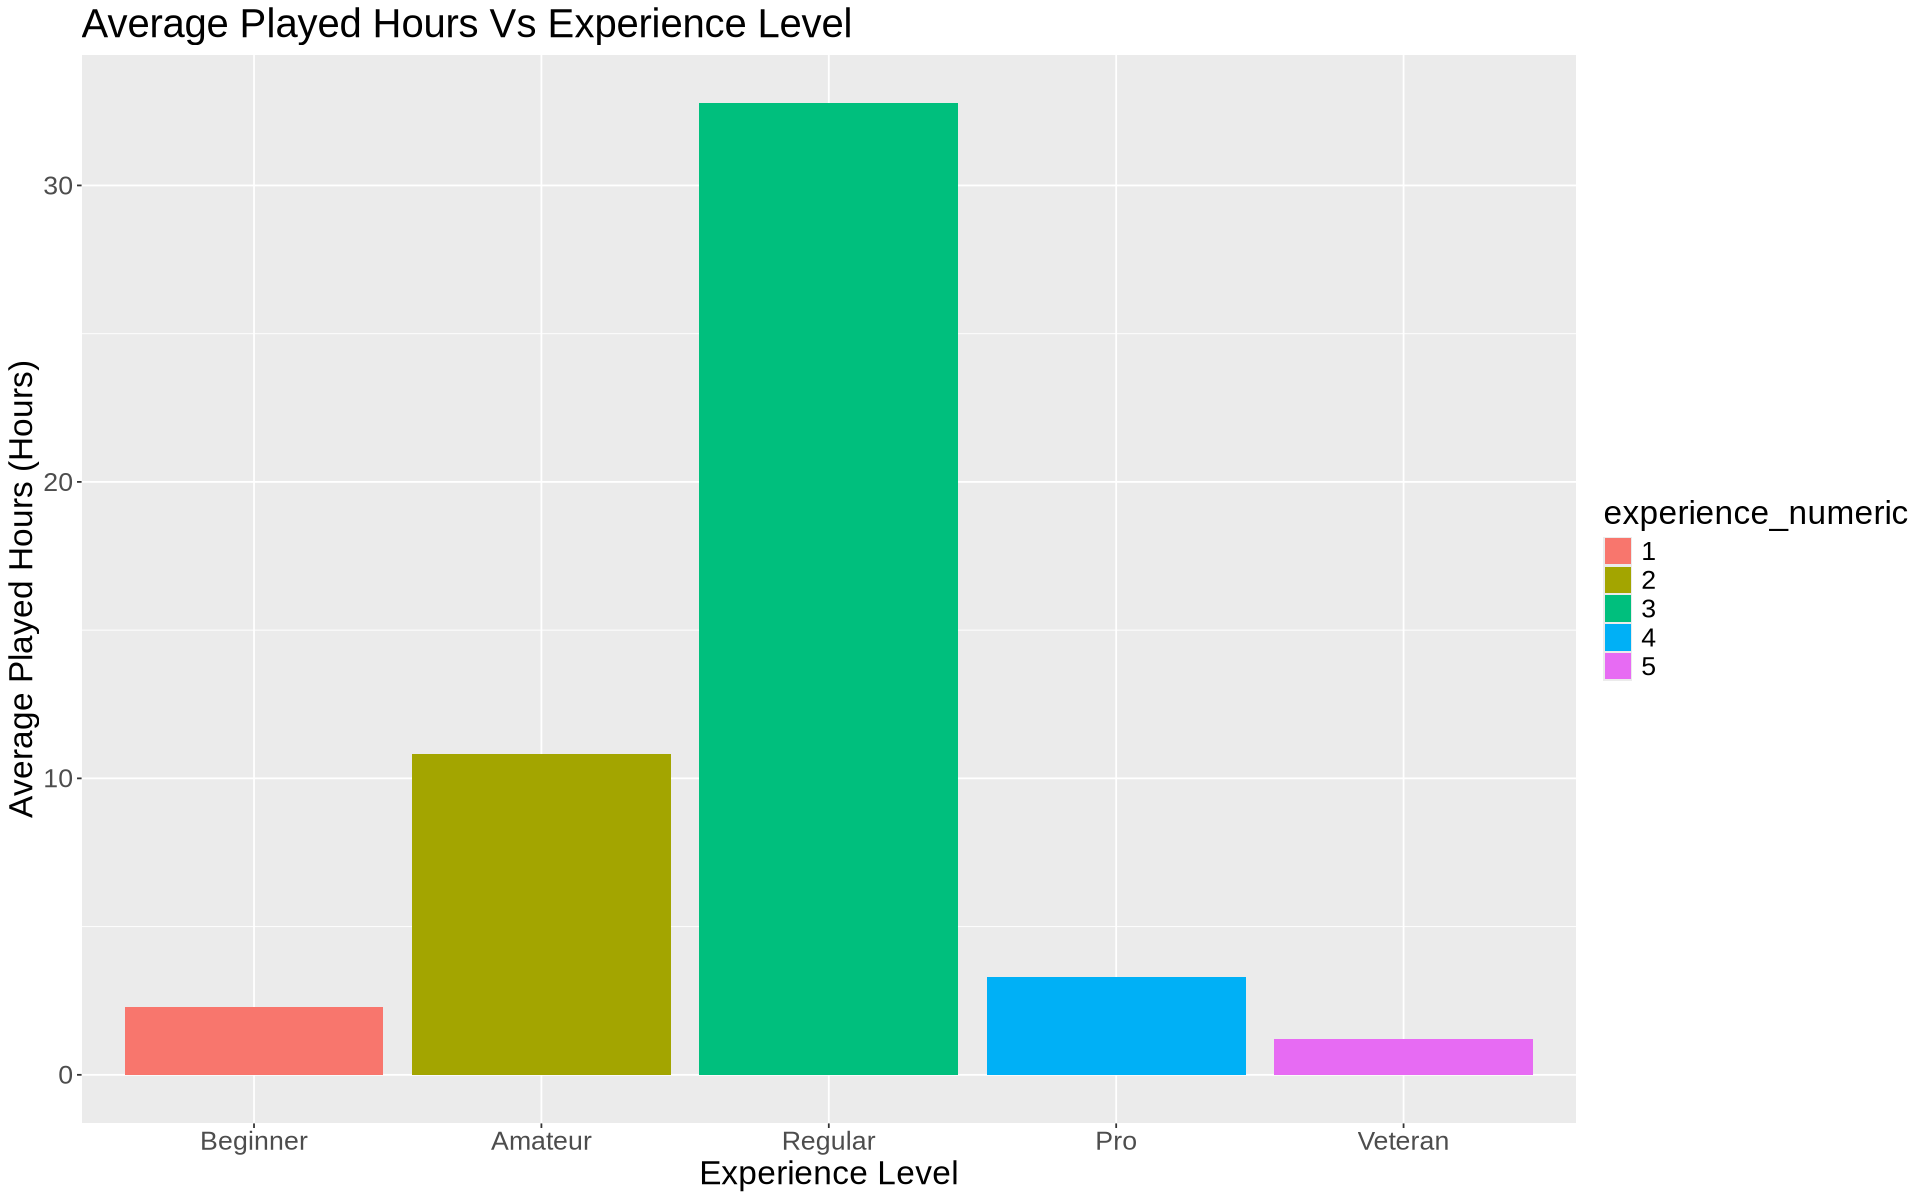

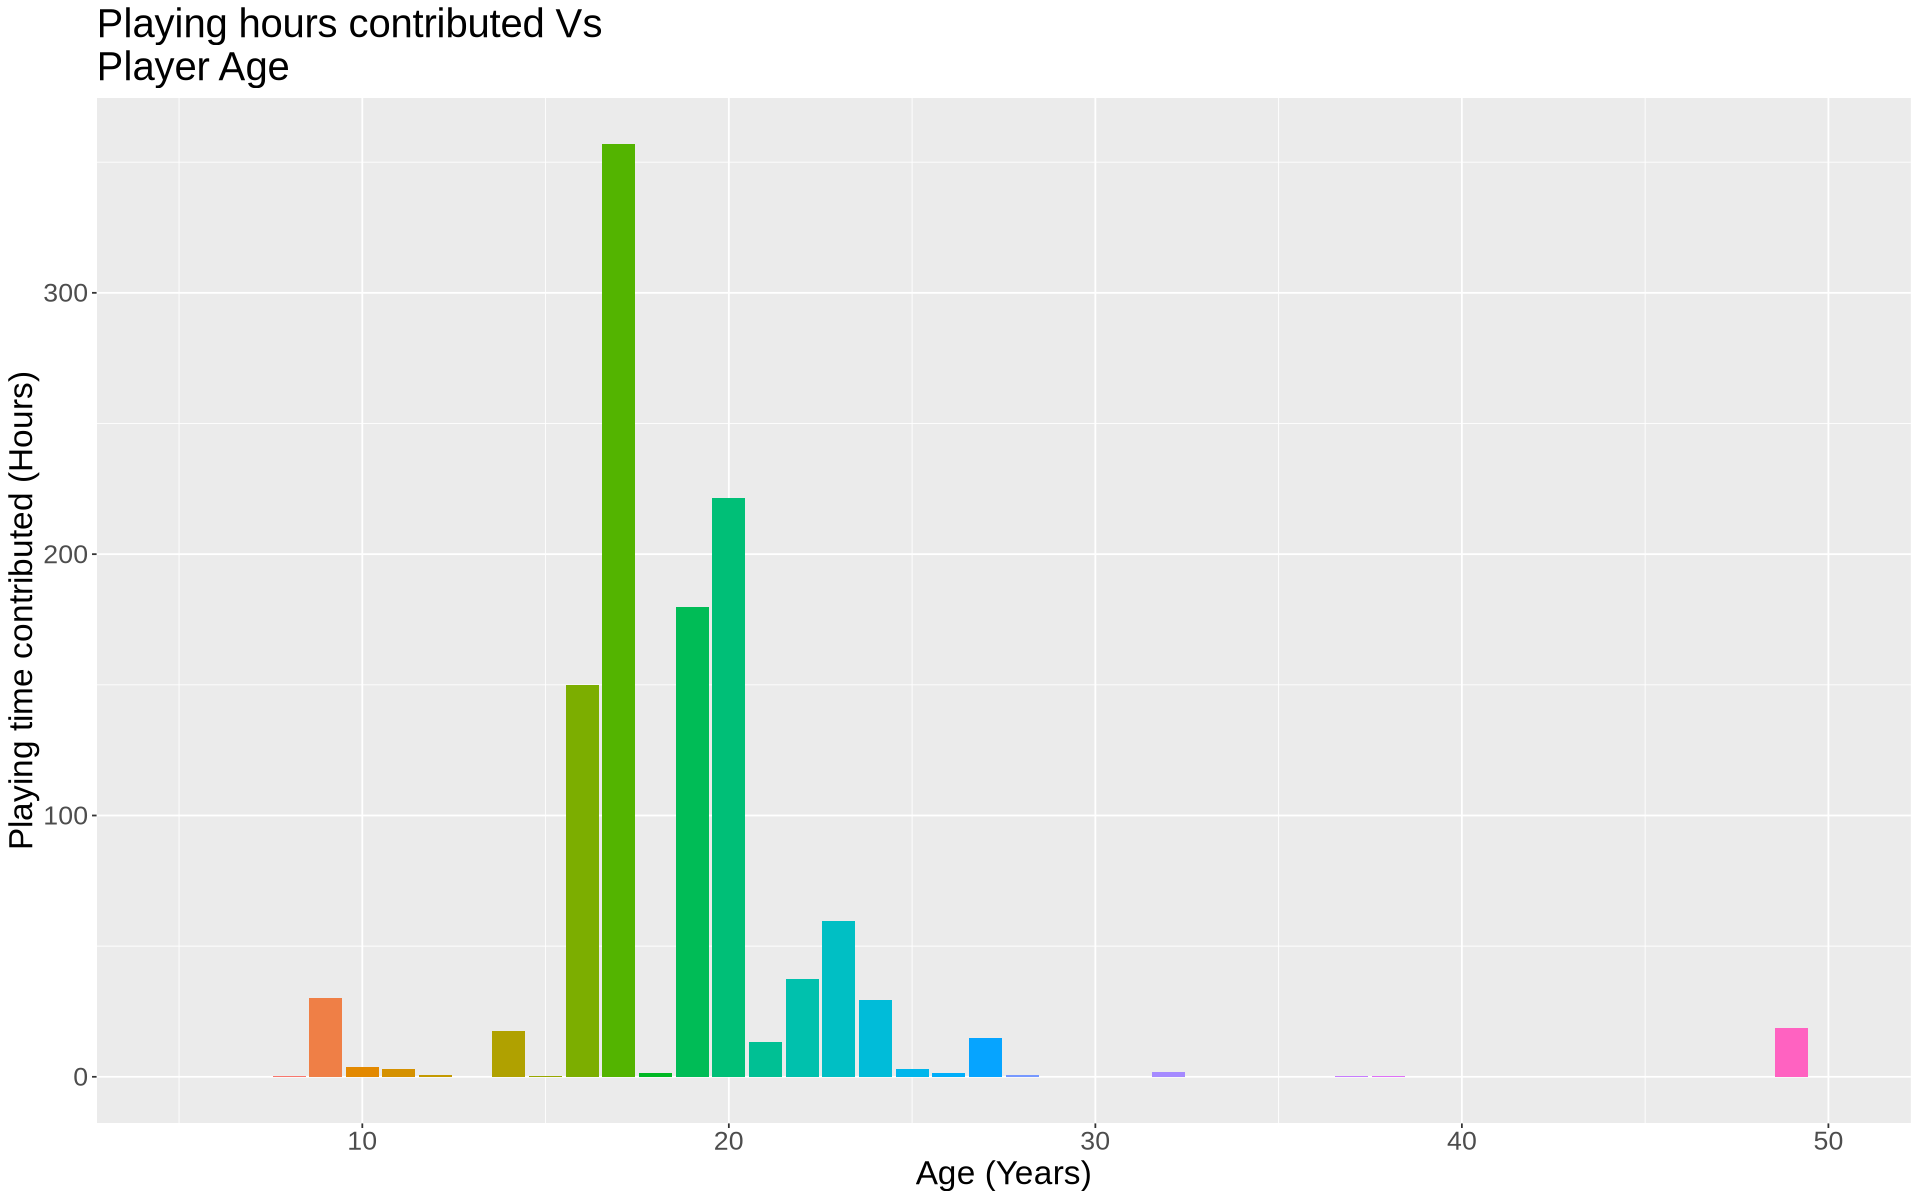

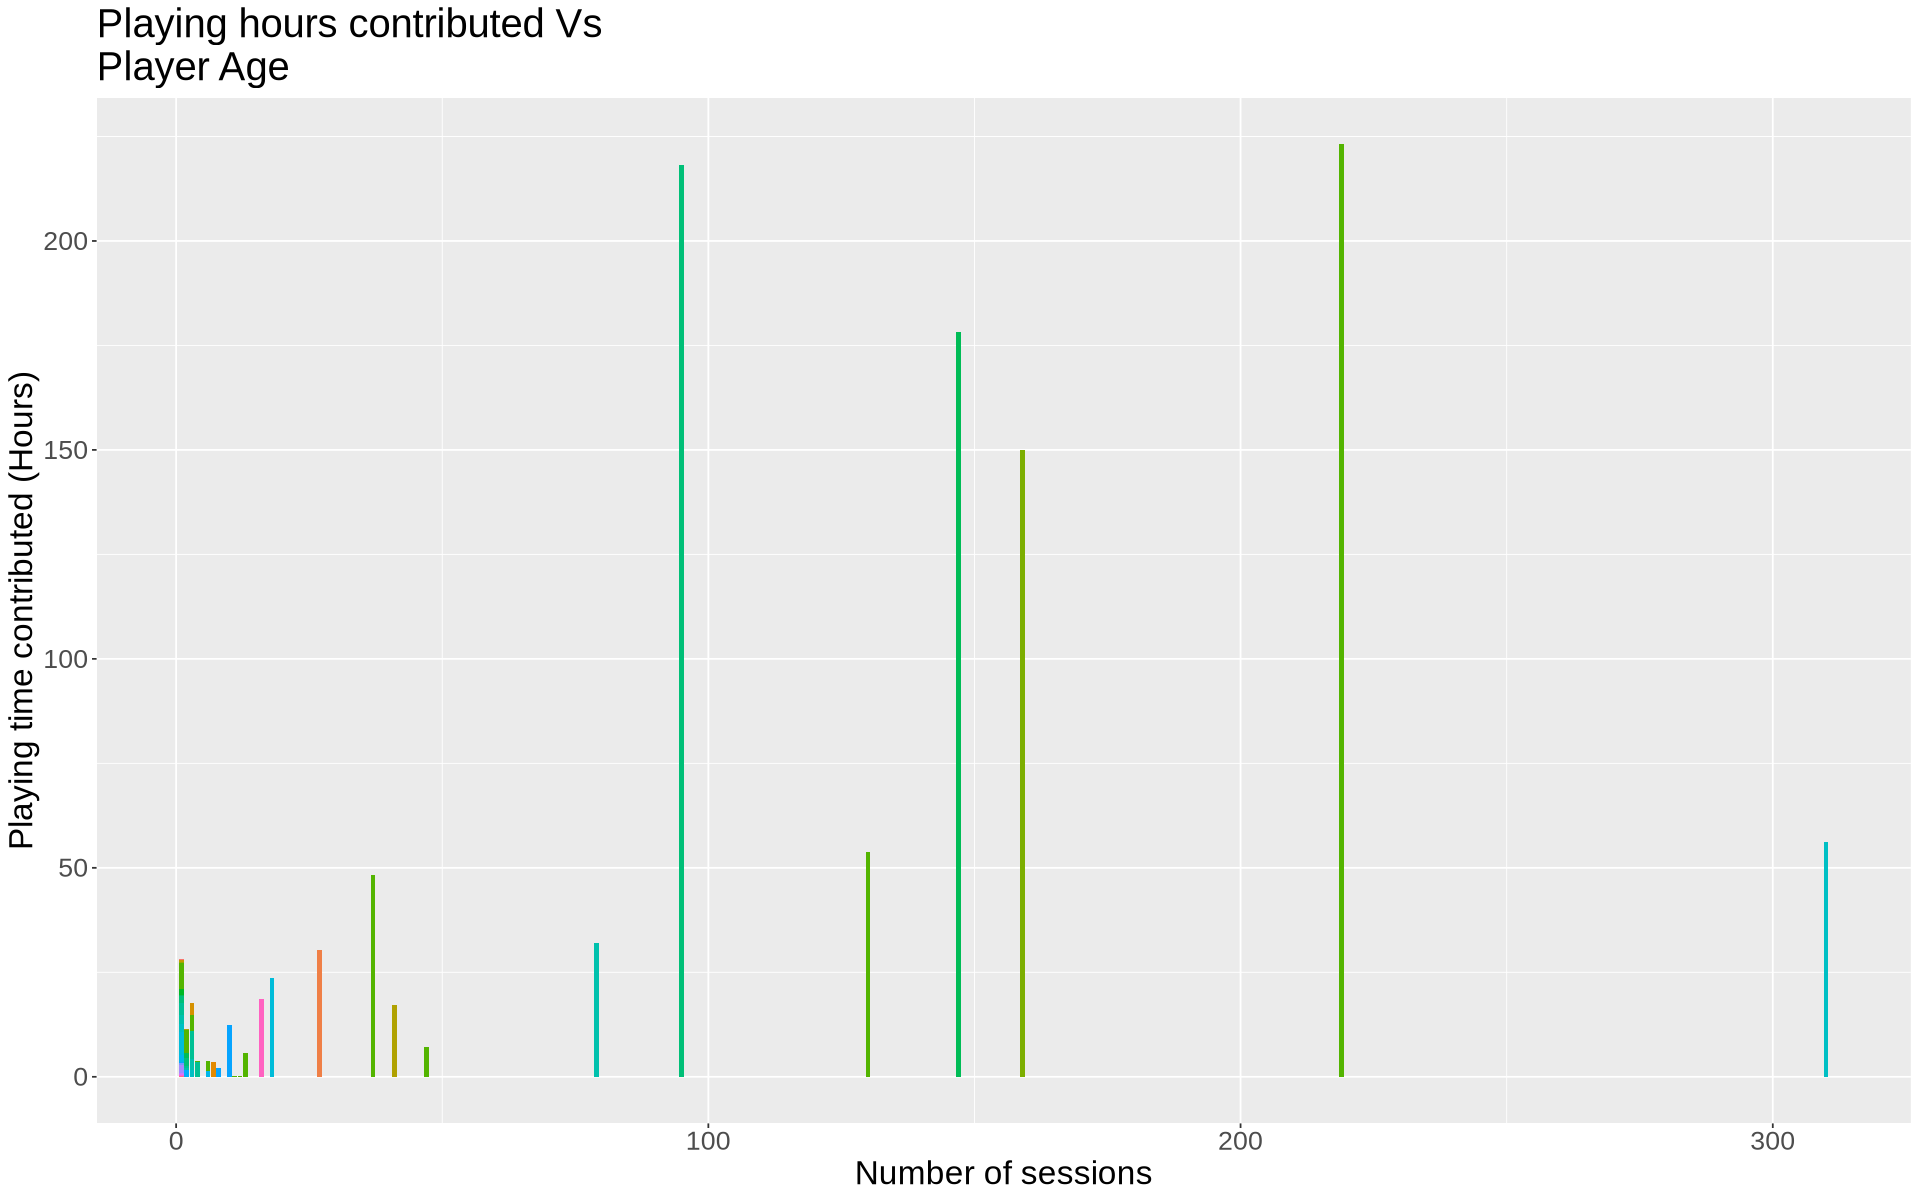

In [4]:
options(repr.plot.width = 16, repr.plot.height = 10) 

#  average played_hours by experience level
avg_played_hours <- merged_final |>
  group_by(experience_numeric) |> 
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE), .groups = "drop")

# Bar plot to visualize average played hours by experience level
ggplot(avg_played_hours, aes(x = experience_numeric, y = avg_played_hours, fill = experience_numeric)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Played Hours Vs Experience Level",
       x = "Experience Level",
       y = "Average Played Hours (Hours)") +
      scale_x_discrete(labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran")) +
    theme(text = element_text(size = 20))
    theme(legend.position = "none")



 #avg age by hours      
avg_played_hours_by_age <- merged_final |>
  group_by(age) |>
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE))

# Bar plot: Played Hours by Age
ggplot(merged_final, aes(x = age, y = played_hours, fill = as.factor(age))) +
  geom_bar(stat = "identity") +
  labs(x = "Age (Years)",
    y = "Playing time contributed (Hours)",
    fill = "Experience",
    title = "Playing hours contributed Vs\nPlayer Age") +
    theme(text = element_text(size = 20)) +
     theme(legend.position = "none") +
    xlim(5,50)

# Bar plot: Played Hours by Sessions
ggplot(merged_final, aes(x = number_of_sessions, y = played_hours, fill = as.factor(age))) +
  geom_bar(stat = "identity") +
  labs(x = "Number of sessions",
    y = "Playing time contributed (Hours)",
    fill = "Experience",
    title = "Playing hours contributed Vs\nPlayer Age") +
    theme(text = element_text(size = 20)) +
     theme(legend.position = "none")


In [5]:
merged_final <- ungroup(merged_final)

merged_final <- merged_final |>
                            mutate(experience_numeric = as.numeric(experience_numeric))

merged_final_no_outliers <- merged_final |>
                            filter(age < 30, age>5)
merged_final_no_outliers
merged_final_age_split <- initial_split(merged_final_no_outliers, prop = .75, strata = age)
hours_age_training <- training(merged_final_age_split)
hours_age_testing <- testing(merged_final_age_split)



hours_experience_split <- initial_split(merged_final, prop = .75, strata = experience_numeric)
hours_experience_training <- training(hours_experience_split)
hours_experience_testing <- testing(hours_experience_split)



hours_sessions_split <- initial_split(merged_final, prop = .75, strata = number_of_sessions)
hours_sessions_training <- training(hours_sessions_split)
hours_sessions_testing <- testing(hours_sessions_split)

subscribe,played_hours,name,gender,age,number_of_sessions,experience_numeric
<lgl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
TRUE,30.3,Morgan,Male,9,27,4
TRUE,3.8,Christian,Male,17,3,5
TRUE,0.7,Flora,Female,21,1,2
TRUE,0.1,Kylie,Male,21,1,3
TRUE,0.1,Natalie,Male,17,1,2
TRUE,1.6,Lane,Female,23,3,5
TRUE,1.5,Sarah,Female,25,1,1
TRUE,0.2,Thatcher,Male,22,1,2
TRUE,48.4,Xander,Female,17,37,2


In [6]:


gridvals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

# Tuning the model for predicting played_hours from age to find best k
hours_age_vfold <- vfold_cv(hours_age_training,v = 5, strata = age)

hours_age_recipe <- recipe(played_hours ~ age, data = hours_age_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

hours_age_workflow <- workflow() |>
                    add_recipe(hours_age_recipe) |>
                    add_model(tune_spec)

hours_age_results <- hours_age_workflow |>
                    tune_grid(resamples = hours_age_vfold, grid = gridvals) |>
                    collect_metrics()

hours_age_min <- hours_age_results |>
   filter(.metric == "rmse") |>
   slice_min(mean,n= 1)

hours_age_min

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,41.55228,5,8.53309,Preprocessor1_Model07


In [7]:

# Tuning the model for predicting played_hours from experience to find best k

hours_experience_vfold <- vfold_cv(hours_experience_training,v = 5, strata = age)

gridvals <- tibble(neighbors = seq(from = 1, to = 59, by = 1))

hours_experience_recipe <- recipe(played_hours ~ experience_numeric, data = hours_experience_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

hours_experience_workflow <- workflow() |>
                    add_recipe(hours_experience_recipe) |>
                    add_model(tune_spec)

hours_experience_results <- hours_age_workflow |>
                    tune_grid(resamples = hours_experience_vfold, grid = gridvals) |>
                    collect_metrics()

hours_experience_min <- hours_experience_results |>
   filter(.metric == "rmse") |>
   slice_min(mean,n= 1)

hours_experience_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
59,rmse,standard,17.43292,5,7.112837,Preprocessor1_Model59


In [8]:
# Tuning the model for predicting played_hours from number_of_sessions to find best k

hours_session_vfold <- vfold_cv(hours_sessions_training, v = 5, strata = number_of_sessions)

gridvals <- tibble(neighbors = seq(from = 1, to = 60, by = 1))

hours_sessions_recipe <- recipe(played_hours ~ number_of_sessions, data = hours_sessions_training) |>
                        step_scale(number_of_sessions) |>
                        step_center(number_of_sessions)

hours_sessions_workflow <- workflow() |>
                        add_recipe(hours_sessions_recipe) |>
                        add_model(tune_spec)

hours_sessions_result <- hours_sessions_workflow |>
                        tune_grid(resamples = hours_session_vfold, grid = gridvals) |>
                        collect_metrics()

hours_sessions_min <- hours_sessions_result |>
                        filter(.metric == "rmse") |>
                        slice_min(mean,n =1)
hours_sessions_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,15.57474,5,6.186924,Preprocessor1_Model03


In [9]:
k_min_age <- hours_age_min |>
         pull(neighbors)

hours_age_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_age) |>
         set_engine("kknn") |>
         set_mode("regression")

hours_age_best_fit <- workflow() |>
         add_recipe(hours_age_recipe) |>
         add_model(hours_age_best_spec) |>
         fit(data = hours_age_training)

hours_age_summary <- hours_age_best_fit |>
          predict(hours_age_testing) |>
          bind_cols(hours_age_testing) |>
          metrics(truth = played_hours, estimate = .pred)

hours_age_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,17.638936605
rsq,standard,0.001899772
mae,standard,11.498979592


In [10]:
k_min_experience <- hours_experience_min |>
         pull(neighbors)

hours_experience_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_experience) |>
         set_engine("kknn") |>
         set_mode("regression")

hours_experience_best_fit <- workflow() |>
         add_recipe(hours_experience_recipe) |>
         add_model(hours_experience_best_spec) |>
         fit(data = hours_experience_training)

hours_experience_summary <- hours_experience_best_fit |>
          predict(hours_experience_testing) |>
          bind_cols(hours_experience_testing) |>
          metrics(truth = played_hours, estimate = .pred)

hours_experience_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,61.87086940
rsq,standard,0.03491385
mae,standard,25.95491525


In [11]:
k_min_sessions <- hours_sessions_min |> pull(neighbors)

hours_sessions_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min_sessions) |>
                            set_engine("kknn") |>
                            set_mode("regression")

hours_sessions_best_fit <- workflow() |>
                            add_recipe(hours_sessions_recipe) |>
                            add_model(hours_sessions_best_spec) |>
                            fit(hours_sessions_training)

hours_sessions_fit_summary <- hours_sessions_best_fit |>
                                predict(hours_sessions_testing) |>
                                bind_cols(hours_sessions_testing) |>
                                metrics(truth = played_hours, estimate = .pred)
hours_sessions_fit_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,40.0458809
rsq,standard,0.3664363
mae,standard,11.8392857


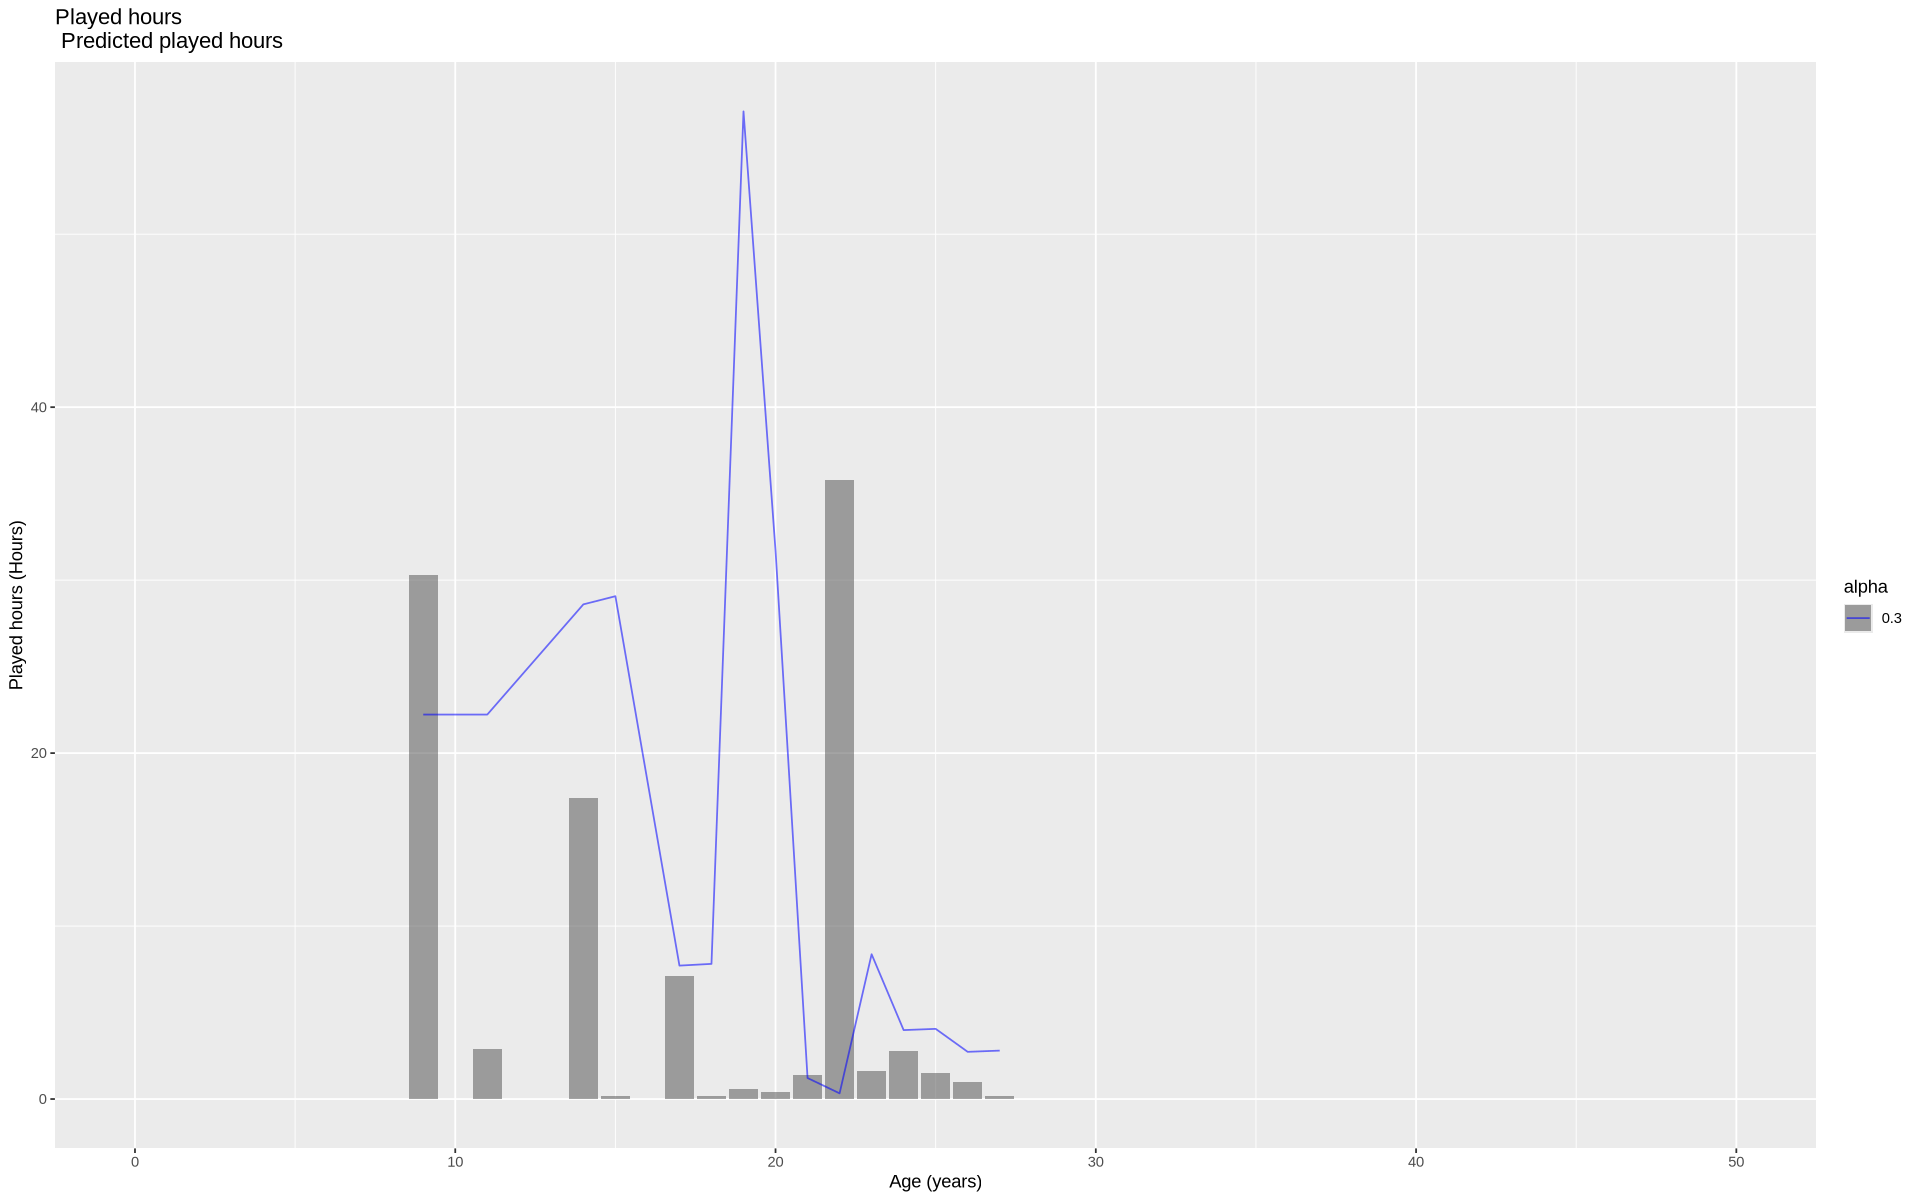

In [12]:

hours_age_predicted_data <- hours_age_best_fit |>
          predict(hours_age_testing) |>
          bind_cols(hours_age_testing)


hours_age_plot <- hours_age_predicted_data |> 
                    ggplot(aes(x = age, y = played_hours,, alpha = 0.3)) +
                    geom_bar(stat = "identity") +  
                    geom_line(aes(x = age, y = .pred), color = "blue") +
                    xlim(c(0, 50))+
                    labs( x = "Age (years)", y = "Played hours (Hours)",
                         title = "Played hours\n Predicted played hours")

  
hours_age_plot